In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk

In [11]:
hotels = pd.read_csv("C:/Users/KIIT/Downloads/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv")

In [13]:
hotels.head(9)

,address,categories,primaryCategories,city,country,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,Unnamed: 14
0,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,NaN
1,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,NaN
2,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,93921,CA,2016-01-06T00:00:00Z,NaN,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,NaN
3,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,93921,CA,2016-08-22T00:00:00Z,NaN,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,NaN
4,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,Best Western Carmel's Town House Lodge,93921,CA,2016-03-21T00:00:00Z,NaN,2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,NaN
5,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,21c Museum Hotel Lexington,40507,KY,2016-03-15T00:00:00Z,NaN,4,http://www.tripadvisor.com/Hotel_Review-g39588...,"This is such a fun, lovely hotel. The attentio...",Loved staying here,NaN
6,167 W Main St,"Hotels,Hotels and motels,Hotel,Restaurants",Accommodation & Food Services,Lexington,US,21c Museum Hotel Lexington,40507,KY,2016-04-18T00:00:00Z,NaN,1,https://www.tripadvisor.com/Hotel_Review-g3958...,We recently stayed at this hotel on a trip to ...,Does not live up to its reputation,NaN
7,115 W Steve Wariner Dr,"Hotels and motels,Hotel",Accommodation & Food Services,Russell Springs,US,Springs Motel LLC,42642,KY,2015-08-13T00:00:00.000Z,NaN,1,https://www.tripadvisor.com/Hotel_Review-g3981...,"I reserved a room a week in advance, knowing a...",worst customer service ever,NaN
8,2240 Buena Vista Rd,"Budget Hotels,Hotels and motels,Hotel and mote...",Accommodation & Food Services,Lexington,US,Microtel Inn Suites By Wyndham Lexington,40505,KY,2017-06-15T00:00:00.000Z,NaN,5,https://www.tripadvisor.co.uk/Hotel_Review-g39...,MoreMore,Location Location Location,NaN


In [12]:
hotels = hotels.iloc[:,:15]

In [14]:
columns = ['city','name','reviews.rating','reviews.text']

In [63]:
data = hotels.loc[:,columns]

In [64]:
data.head()

,city,name,reviews.rating,reviews.text
0,Goleta,Best Western Plus South Coast Inn,3,"This hotel was nice and quiet. Did not know, t..."
1,Carmel by the Sea,Best Western Carmel's Town House Lodge,4,We stayed in the king suite with the separatio...
2,Carmel by the Sea,Best Western Carmel's Town House Lodge,3,"Parking was horrible, somebody ran into my ren..."
3,Carmel by the Sea,Best Western Carmel's Town House Lodge,5,Not cheap but excellent location. Price is som...
4,Carmel by the Sea,Best Western Carmel's Town House Lodge,2,If you get the room that they advertised on th...


In [28]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
data.groupby('city').mean()['reviews.rating']

city
Aberdeen       4.000000
Abilene        1.000000
Abingdon       2.666667
Adairsville    4.000000
Aiken          3.600000
                 ...   
Yonkers        5.000000
York           3.000000
Youngstown     2.833333
Yountville     5.000000
Yuma           5.000000
Name: reviews.rating, Length: 842, dtype: float64

In [20]:
# Some visualizations

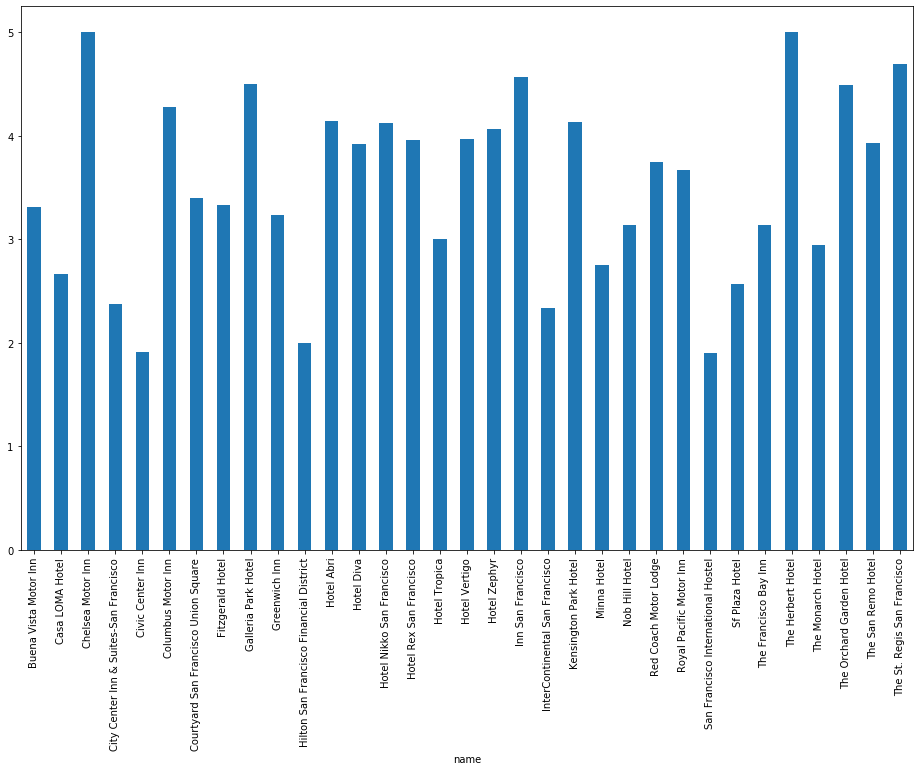

In [23]:
data[data['city'] == "San Francisco"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in San Francisco

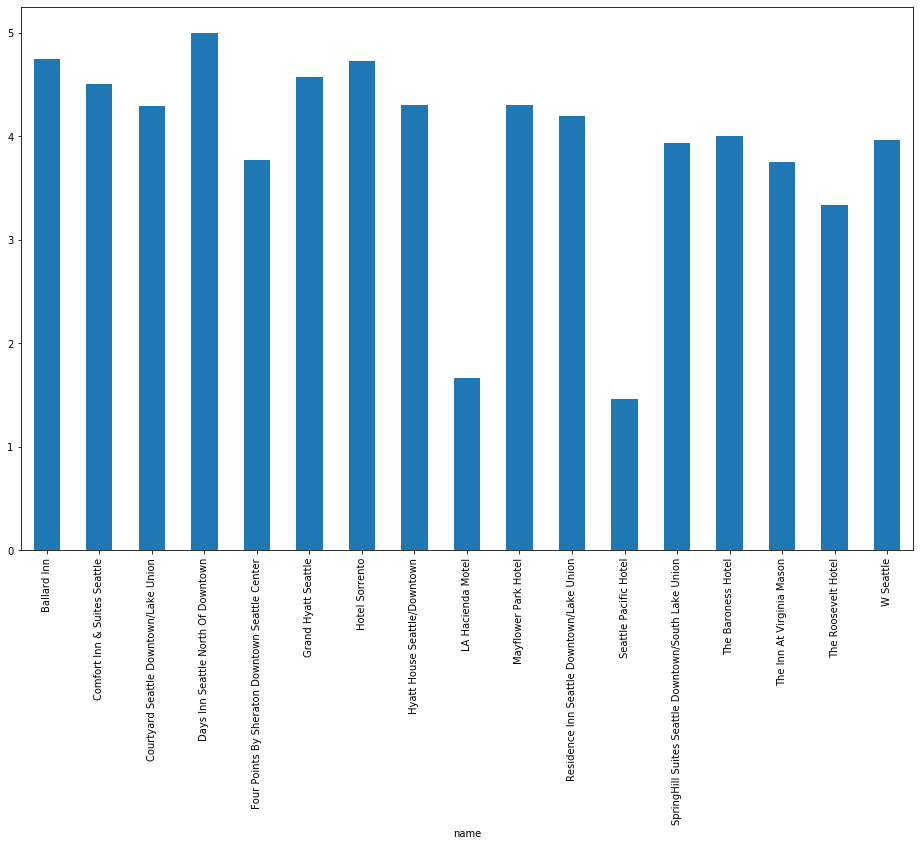

In [24]:
data[data['city'] == "Seattle"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in Seattle

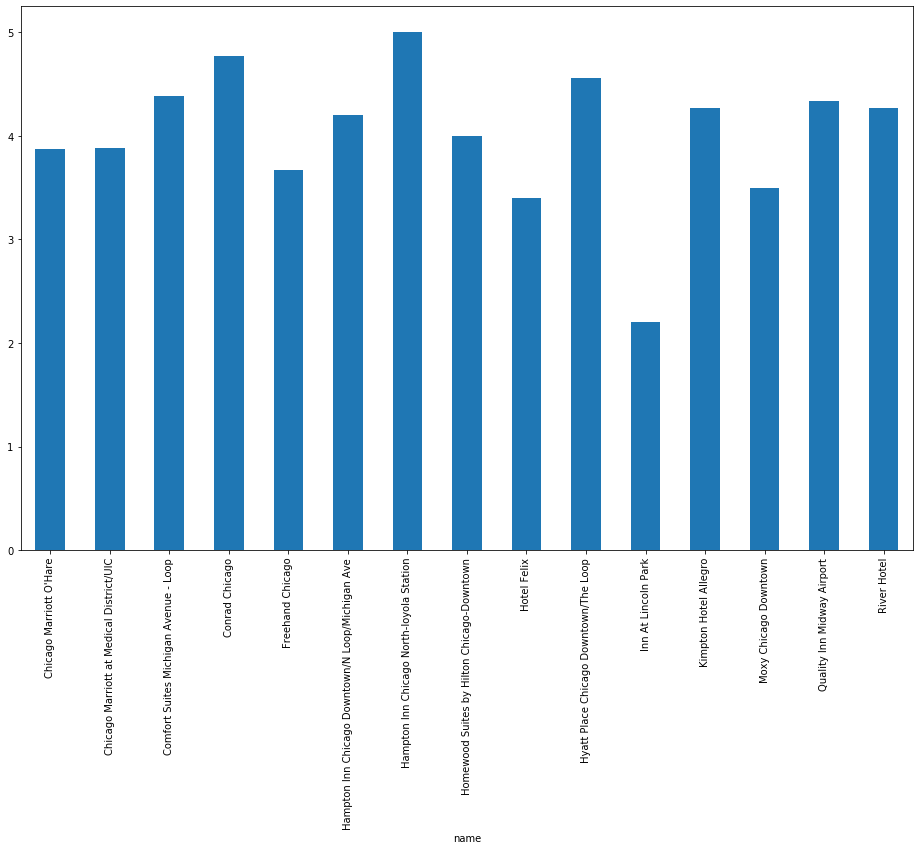

In [144]:
data[data['city'] == "Chicago"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in Chicago

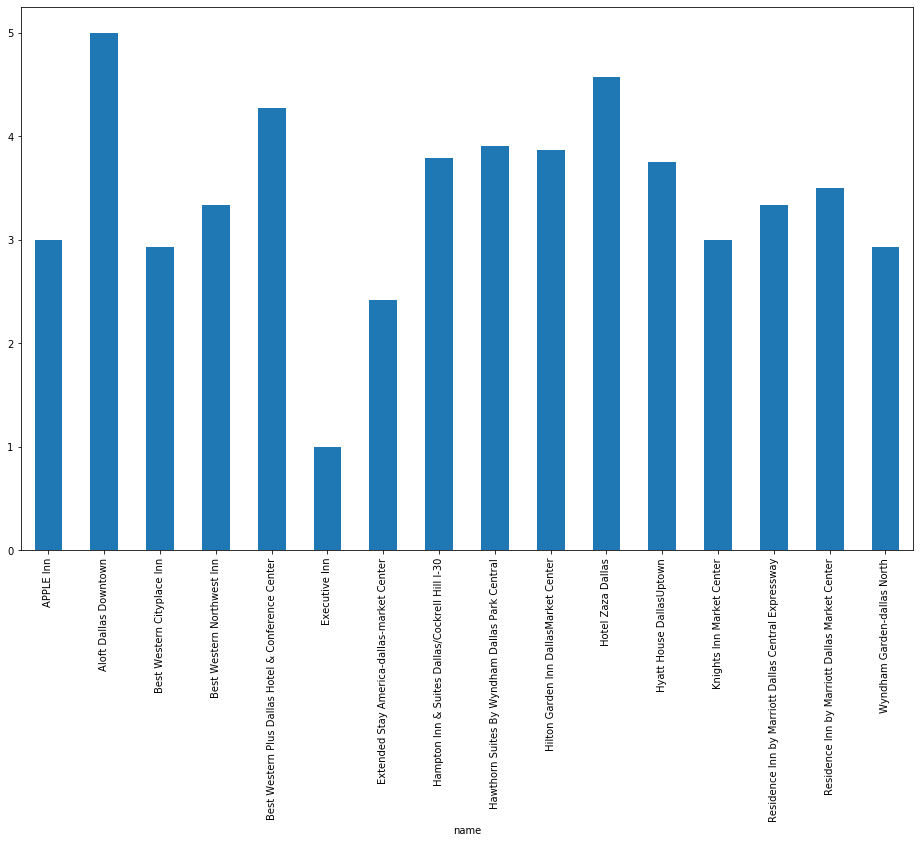

In [145]:
data[data['city'] == "Dallas"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in Dallas

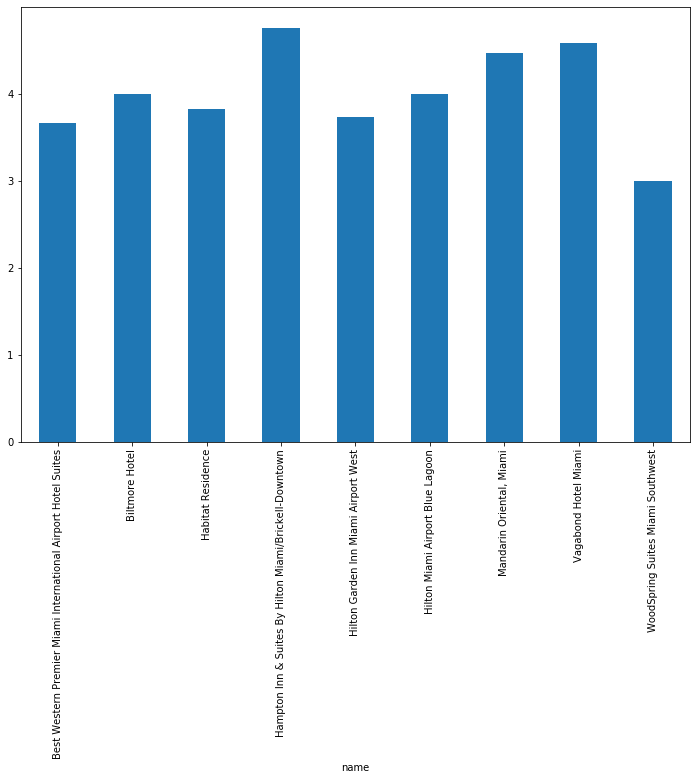

In [147]:
data[data['city'] == "Miami"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(12,8))
# Average ratings for hotels in Miami

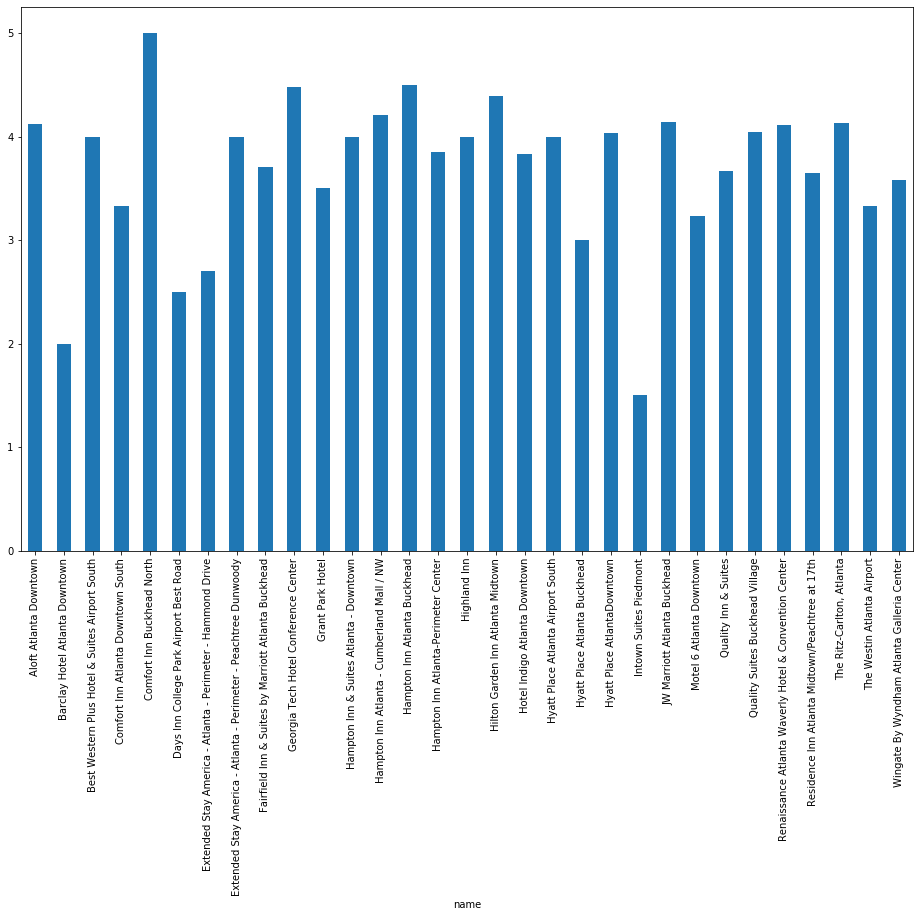

In [148]:
data[data['city'] == "Atlanta"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in Atlanta

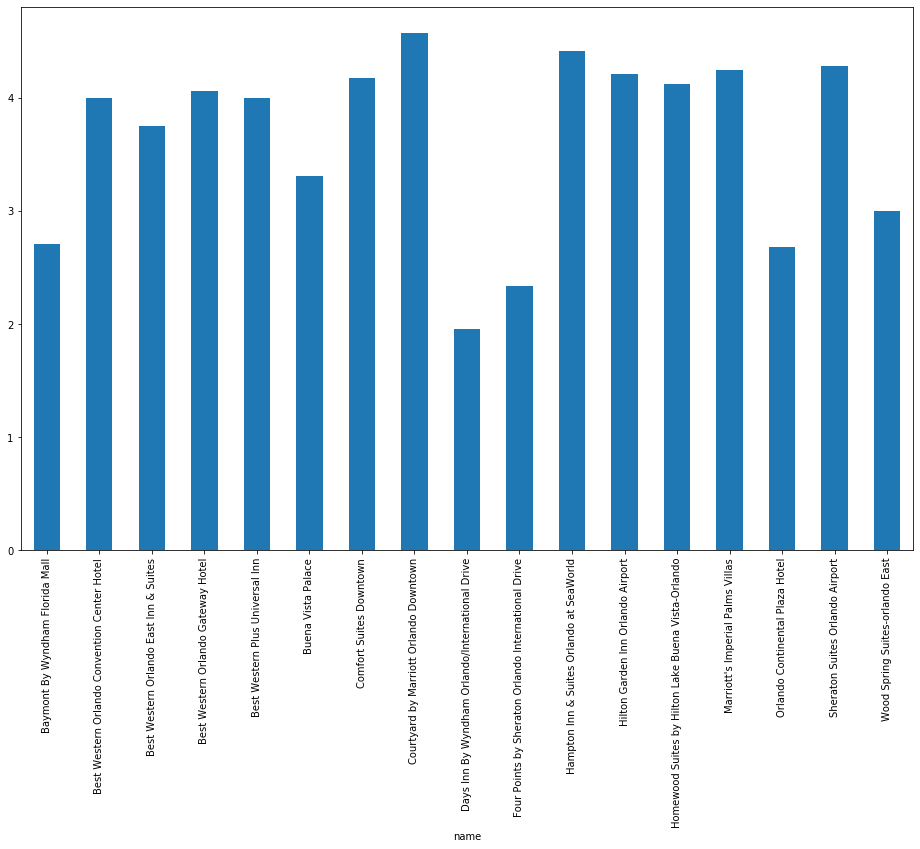

In [149]:
data[data['city'] == "Orlando"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(16,10))
# Average ratings for hotels in Orlando

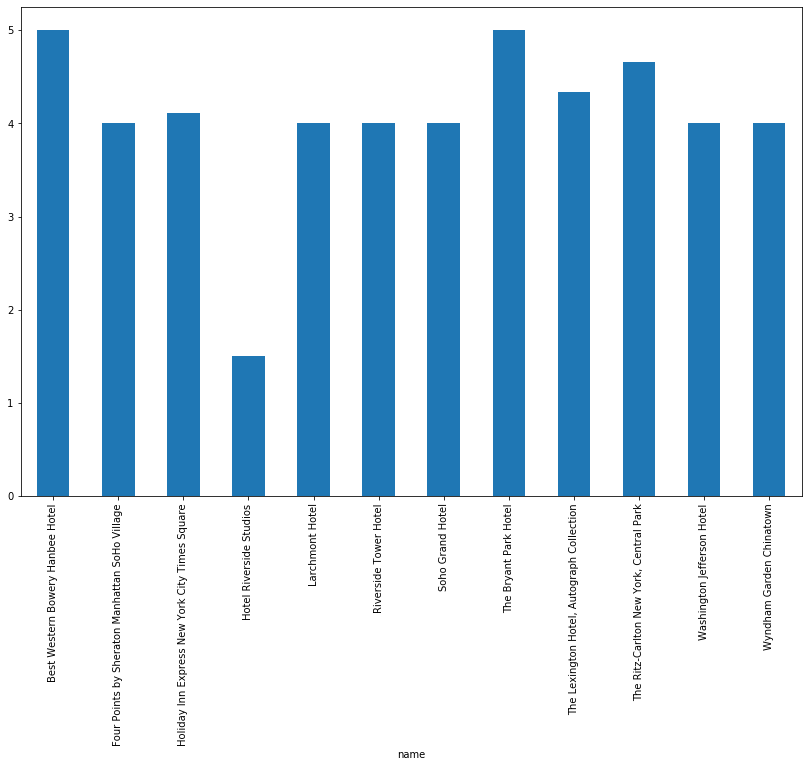

In [175]:
data[data['city'] == "New York"].groupby('name').mean()['reviews.rating'].plot(kind="bar",figsize=(14,9))
# Average ratings for hotels in NYC

In [66]:
for i in range(len(data['reviews.text'])):
    data.loc[i,'reviews.text'] = str(data.loc[i,'reviews.rating']) + " " + data.loc[i,'reviews.text']

In [67]:
data.loc[1,'reviews.text']

"4 We stayed in the king suite with the separation between the bedroom and the living space. The sofa bed wasn't very good I had back discomfort by the day we left on our three night stay. The room is clean, and the king bed very comfortable. This hotel is located within walking distance to most places you will want to... More"

In [37]:
stemmer = SnowballStemmer('english')

In [72]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text,a):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    result.append(str(a))        
    return result

In [73]:
doc_sample = data['reviews.text'][0]
rate = data['reviews.rating'][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample,rate))

original document: 
['3', 'This', 'hotel', 'was', 'nice', 'and', 'quiet.', 'Did', 'not', 'know,', 'there', 'was', 'train', 'track', 'near', 'by.', 'But', 'it', 'was', 'only', 'few', 'train', 'passed', 'during', 'our', 'stay.', 'Best', 'Western', 'changed', 'hotel', 'classification.', 'The', 'Plus', 'category', 'are', 'not', 'the', 'same', 'as', 'before.']


 tokenized and lemmatized document: 
['hotel', 'nice', 'quiet', 'know', 'train', 'track', 'near', 'train', 'pass', 'stay', 'best', 'western', 'chang', 'hotel', 'classif', 'plus', 'categori', '3']


In [107]:
for i in range(len(data['reviews.text'])):
    processed_docs[i] = preprocess(data.loc[i,'reviews.text'],data.loc[i,'reviews.rating'])

In [98]:
processed_docs[:15]

0     [hotel, nice, quiet, know, train, track, near,...
1     [stay, king, suit, separ, bedroom, live, space...
2     [park, horribl, somebodi, rental, stay, breakf...
3     [cheap, excel, locat, price, somewhat, standar...
4     [room, adverti, websit, lucki, stay, good, roo...
5     [love, hotel, attent, impress, thicker, water,...
6     [recent, stay, hotel, trip, lexington, friend,...
7     [reserv, room, week, advanc, know, motel, usua...
8                                          [moremor, 5]
9     [hello, travel, abroad, worst, place, book, wa...
10    [hampton, decor, color, scheme, feel, luxuri, ...
11    [stay, night, explor, nearbi, santa, barbara, ...
12    [complet, accommod, hotel, book, reserv, minut...
13    [water, cold, water, food, good, staff, friend...
14    [great, staff, room, housekeep, spot, come, pe...
Name: reviews.text, dtype: object

In [76]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [77]:
dictionary

In [78]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [80]:
for i in range(len(processed_docs)):
    processed_docs[i] = ' '.join(processed_docs[i])

data['reviews.text'] = processed_docs

In [109]:
five = data[data['reviews.rating'] == 5]

In [ ]:
#popular words in reviews

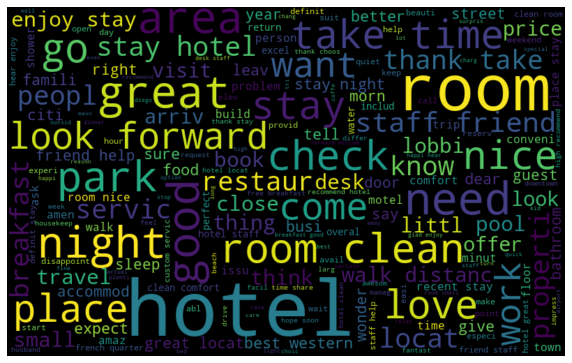

In [51]:
all_words = ' '.join([text for text in data['reviews.text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [52]:
# popular words in 5 star rated reviews

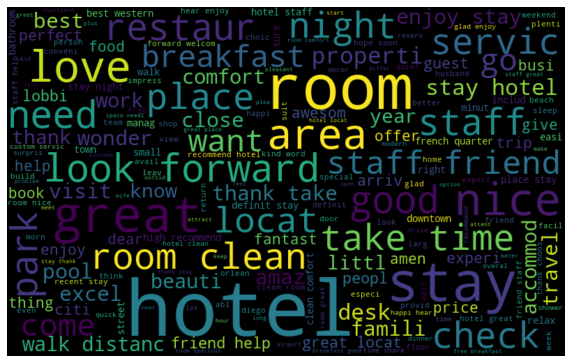

In [53]:
all_words = ' '.join([text for text in five['reviews.text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
#popular words in negative reviews 

In [55]:
negative = data[data['reviews.rating'] <= 3]

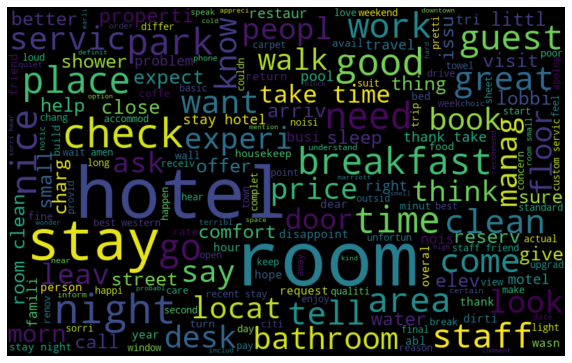

In [56]:
all_words = ' '.join([text for text in negative['reviews.text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:
# Let's instead divide the reviews into categories rating wise 

In [74]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))       
    return result

In [132]:
five = data[data['reviews.rating'] == 5]
five.reset_index(inplace=True)
processed_doc = five['reviews.text'].map(preprocess)
dictionary = gensim.corpora.Dictionary(processed_doc)
bow_corpus5 = [dictionary.doc2bow(doc) for doc in processed_doc]

for i in range(len(processed_doc)):
    processed_doc[i] = ' '.join(processed_doc[i])

#five['reviews.text'] = processed_d

lda_model5 = gensim.models.LdaMulticore(bow_corpus5, num_topics=5, id2word=dictionary, passes=6, workers=2)
for idx, topic in lda_model5.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"hotel" + 0.029*"stay" + 0.021*"room" + 0.017*"great" + 0.015*"staff" + 0.012*"locat" + 0.011*"time" + 0.011*"thank" + 0.009*"walk" + 0.008*"breakfast"
Topic: 1 
Words: 0.029*"stay" + 0.024*"hotel" + 0.020*"staff" + 0.019*"room" + 0.015*"time" + 0.015*"thank" + 0.010*"great" + 0.010*"friend" + 0.009*"review" + 0.009*"clean"
Topic: 2 
Words: 0.034*"room" + 0.029*"hotel" + 0.024*"stay" + 0.017*"staff" + 0.016*"great" + 0.016*"breakfast" + 0.014*"clean" + 0.013*"good" + 0.012*"area" + 0.011*"friend"
Topic: 3 
Words: 0.044*"stay" + 0.027*"great" + 0.023*"room" + 0.023*"hotel" + 0.020*"thank" + 0.014*"time" + 0.013*"staff" + 0.012*"locat" + 0.010*"look" + 0.010*"clean"
Topic: 4 
Words: 0.024*"room" + 0.020*"stay" + 0.019*"nice" + 0.019*"hotel" + 0.016*"breakfast" + 0.015*"staff" + 0.013*"clean" + 0.011*"friend" + 0.011*"great" + 0.010*"comfort"


In [218]:
five['reviews.text'] = processed_doc

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
one = data[data['reviews.rating'] == 1]
one.reset_index(inplace=True)
processed = one['reviews.text'].map(preprocess)
dictionary = gensim.corpora.Dictionary(processed)
bow_corpus1 = [dictionary.doc2bow(doc) for doc in processed]
for i in range(len(processed)):
    processed[i] = ' '.join(processed[i])

one['reviews.text'] = processed


C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [137]:
lda_model1 = gensim.models.LdaMulticore(bow_corpus1, num_topics=3, id2word=dictionary, passes=3, workers=2)
for idx, topic in lda_model1.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.044*"room" + 0.024*"hotel" + 0.023*"stay" + 0.009*"time" + 0.008*"experi" + 0.008*"night" + 0.008*"book" + 0.007*"like" + 0.007*"place" + 0.007*"guest"
Topic: 1 
Words: 0.025*"room" + 0.020*"hotel" + 0.013*"stay" + 0.010*"manag" + 0.009*"tell" + 0.009*"check" + 0.008*"desk" + 0.008*"night" + 0.007*"staff" + 0.006*"guest"
Topic: 2 
Words: 0.029*"hotel" + 0.021*"room" + 0.019*"stay" + 0.011*"night" + 0.009*"servic" + 0.009*"guest" + 0.009*"book" + 0.008*"experi" + 0.007*"time" + 0.007*"staff"


In [131]:
four = data[data['reviews.rating'] == 4]
four.reset_index(inplace=True)
processed_d = four['reviews.text'].map(preprocess)
dictionary = gensim.corpora.Dictionary(processed_d)
bow_corpus4 = [dictionary.doc2bow(doc) for doc in processed_d]

for i in range(len(processed_d)):
    processed_d[i] = ' '.join(processed_d[i])

four['reviews.text'] = processed_d

lda_model4 = gensim.models.LdaMulticore(bow_corpus4, num_topics=5, id2word=dictionary, passes=6, workers=2)
for idx, topic in lda_model4.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Topic: 0 
Words: 0.025*"stay" + 0.024*"room" + 0.023*"hotel" + 0.016*"locat" + 0.016*"staff" + 0.013*"great" + 0.013*"walk" + 0.010*"friend" + 0.010*"clean" + 0.009*"night"
Topic: 1 
Words: 0.036*"room" + 0.032*"stay" + 0.030*"hotel" + 0.016*"staff" + 0.015*"clean" + 0.015*"great" + 0.014*"breakfast" + 0.012*"thank" + 0.011*"time" + 0.011*"nice"
Topic: 2 
Words: 0.031*"hotel" + 0.019*"stay" + 0.014*"room" + 0.014*"thank" + 0.009*"breakfast" + 0.009*"great" + 0.009*"good" + 0.009*"staff" + 0.009*"guest" + 0.008*"nice"
Topic: 3 
Words: 0.038*"room" + 0.027*"hotel" + 0.017*"stay" + 0.015*"nice" + 0.013*"locat" + 0.011*"clean" + 0.010*"great" + 0.010*"pool" + 0.009*"area" + 0.008*"park"
Topic: 4 
Words: 0.025*"good" + 0.020*"room" + 0.015*"hotel" + 0.015*"servic" + 0.011*"stay" + 0.011*"nice" + 0.009*"breakfast" + 0.008*"clean" + 0.008*"park" + 0.008*"locat"


In [101]:
three = data[data['reviews.rating'] == 3]
three.reset_index(inplace=True)
process = three['reviews.text'].map(preprocess)

dictionary = gensim.corpora.Dictionary(process)
bow_corpus3 = [dictionary.doc2bow(doc) for doc in process]
for i in range(len(process)):
    process[i] = ' '.join(process[i])

three['reviews.text'] = process

lda_model3 = gensim.models.LdaMulticore(bow_corpus3, num_topics=6, id2word=dictionary, passes=5, workers=2)
for idx, topic in lda_model3.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Topic: 0 
Words: 0.034*"room" + 0.024*"hotel" + 0.020*"stay" + 0.009*"guest" + 0.008*"time" + 0.008*"thank" + 0.007*"clean" + 0.007*"bathroom" + 0.007*"good" + 0.007*"like"
Topic: 1 
Words: 0.041*"hotel" + 0.032*"room" + 0.022*"stay" + 0.011*"staff" + 0.009*"breakfast" + 0.009*"good" + 0.009*"nice" + 0.008*"time" + 0.008*"night" + 0.008*"check"
Topic: 2 
Words: 0.029*"room" + 0.023*"stay" + 0.021*"hotel" + 0.014*"thank" + 0.012*"time" + 0.010*"staff" + 0.010*"guest" + 0.010*"experi" + 0.009*"breakfast" + 0.008*"park"
Topic: 3 
Words: 0.023*"room" + 0.017*"night" + 0.015*"hotel" + 0.015*"park" + 0.015*"good" + 0.012*"stay" + 0.009*"breakfast" + 0.009*"clean" + 0.009*"free" + 0.008*"guest"
Topic: 4 
Words: 0.041*"room" + 0.022*"hotel" + 0.017*"stay" + 0.011*"staff" + 0.010*"clean" + 0.009*"locat" + 0.008*"small" + 0.008*"nice" + 0.008*"night" + 0.008*"need"
Topic: 5 
Words: 0.047*"room" + 0.029*"hotel" + 0.022*"stay" + 0.014*"locat" + 0.013*"nice" + 0.012*"clean" + 0.012*"breakfast" + 0.

In [140]:
two = data[data['reviews.rating'] == 2]
two.reset_index(inplace=True)
proc = two['reviews.text'].map(preprocess)

dictionary = gensim.corpora.Dictionary(proc)
bow_corpus2 = [dictionary.doc2bow(doc) for doc in proc]
for i in range(len(proc)):
    proc[i] = ' '.join(proc[i])

two['reviews.text'] = proc

lda_model2 = gensim.models.LdaMulticore(bow_corpus2, num_topics=2, id2word=dictionary, passes=3, workers=2)
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Topic: 0 
Words: 0.028*"hotel" + 0.025*"room" + 0.022*"stay" + 0.010*"time" + 0.008*"thank" + 0.008*"guest" + 0.007*"staff" + 0.007*"like" + 0.007*"breakfast" + 0.007*"night"
Topic: 1 
Words: 0.034*"room" + 0.020*"hotel" + 0.017*"stay" + 0.012*"night" + 0.009*"desk" + 0.008*"time" + 0.008*"clean" + 0.008*"check" + 0.007*"staff" + 0.006*"experi"


In [94]:
# Dataframe columns  : Hotel name ,parent group , brand category ,city , average rating(mean) , majority rating(mode) , majority 3 review topics  

In [141]:
data.head()

,city,name,reviews.rating,reviews.text
0,Goleta,Best Western Plus South Coast Inn,3,hotel nice quiet know train track near train p...
1,Carmel by the Sea,Best Western Carmel's Town House Lodge,4,stay king suit separ bedroom live space sofa w...
2,Carmel by the Sea,Best Western Carmel's Town House Lodge,3,park horribl somebodi rental stay breakfast bu...
3,Carmel by the Sea,Best Western Carmel's Town House Lodge,5,cheap excel locat price somewhat standard hace...
4,Carmel by the Sea,Best Western Carmel's Town House Lodge,2,room advertis websit pay lucki stay day good r...


In [157]:
ser = data['name'].unique()

In [161]:
len(ser)

1311

In [181]:
ser[667]

'Hilton Garden Inn Harrisburg East'

In [183]:
# marriott : luxury - 30,947,952,816  Premium - 788,18,21,90,146,220,238,254,279,311,315,326,712,720,847,911,935,953,957,967,978,1021,1079,1122,1145,1296,938,1148,77,363,845,19,221,299,302,446,528,852,860,957,1007,1166
# hyatt : Luxury - 79,48,1165         Premium - 75,191,315,500,615,639,643,664,665,850,905,1146,1219,1253
# Best Western : Luxury - 1060        Premium - 0,1,23,35,55,58,61,71,89,108,135,136,155,172,184,193,194,202,203,207,213,219,226,230,244,249,253,256,264,265,270,274,277,300,317,322,323,327,329,330,342,347,354,356,369,371,382,427,429,432,433,471,519,600,630,642,646,650,651,653,669,672,676,680,681,683,705,710,740,744,749,775,778,784,787,794,811,819,821,825,827,832,839,841,842,854,855,860,862,864,865,867,874,879,883,885,891,899,900,939,943,944,945,951,990,992,994,996,998,1000,1003,1009,1011,1015,1024,1037,1043,1052,1062,1065,1068,1084,1087,1088,1090,1094,1097,1103,1105,1108,1110,1113,1116,1117,1118,1119,1120,1121,1127,1128,1129,1131,1137,1141,1156,1170,1210,1222
# Hilton : Luxury - 1301              Premium - 34,60,83,85,88,126,131,147,206,208,255,266,318,338,368,372,405,428,440,445,540,555,575,601,618,622,645,667,693,716,745,781,805,829,834,872,897,898,925,932,948,985,989,1001,1012,1027,1033,1053,1055,1064,1080,1098,1149,1190,1202,1215,1222,1270,1274,1276,1302,1307
# Mandarin : Luxury - 999
# Wyndham : Luxury - none             Premium - 4,57,65,98,122,166,237,258,281,282,292,312,341,385,398,416,475,532,551,573,595,596,713,984,1016,1049,1089,1124,1129,1168,1197,1238,1293
# IHG : Luxury - 267                  Premium - 314,362,383,484,534,1182,143,175,619,815
# Radisson :                          Premium - 388,530

In [205]:
m1 = [30,947,952,816]
m2 = [788,18,21,90,146,220,238,254,279,311,315,326,712,720,847,911,935,953,957,967,978,1021,1079,1122,1145,1296,938,1148,77,363,845,19,221,299,302,446,528,852,860,957,1007,1166]
h1 = [79,48,1165]
h2 = [75,191,315,500,615,639,643,664,665,850,905,1146,1219,1253]
b1 = [1060]
b2 = [0,1,23,35,55,58,61,71,89,108,135,136,155,172,184,193,194,202,203,207,213,219,226,230,244,249,253,256,264,265,270,274,277,300,317,322,323,327,329,330,342,347,354,356,369,371,382,427,429,432,433,471,519,600,630,642,646,650,651,653,669,672,676,680,681,683,705,710,740,744,749,775,778,784,787,794,811,819,821,825,827,832,839,841,842,854,855,860,862,864,865,867,874,879,883,885,891,899,900,939,943,944,945,951,990,992,994,996,998,1000,1003,1009,1011,1015,1024,1037,1043,1052,1062,1065,1068,1084,1087,1088,1090,1094,1097,1103,1105,1108,1110,1113,1116,1117,1118,1119,1120,1121,1127,1128,1129,1131,1137,1141,1156,1170,1210,1222
]
ma = [999]
hi1 = [1301]
hi2 = [34,60,83,85,88,126,131,147,206,208,255,266,318,338,368,372,405,428,440,445,540,555,575,601,618,622,645,667,693,716,745,781,805,829,834,872,897,898,925,932,948,985,989,1001,1012,1027,1033,1053,1055,1064,1080,1098,1149,1190,1202,1215,1222,1270,1274,1276,1302,1307]
w2 = [4,57,65,98,122,166,237,258,281,282,292,312,341,385,398,416,475,532,551,573,595,596,713,984,1016,1049,1089,1124,1129,1168,1197,1238,1293]
i1 = [267]
i2 = [314,362,383,484,534,1182,143,175,619,815]
r2 = [388,530]

In [187]:
hotels = pd.DataFrame()

In [189]:
hotels['name'] = ser

In [212]:
hotels

,name,average_rate,maximum_rate,brand_name,category
0,Best Western Plus South Coast Inn,3.000000,3.0,Best Western,Premium
1,Best Western Carmel's Town House Lodge,3.500000,2.0,Best Western,Premium
2,21c Museum Hotel Lexington,2.500000,1.0,None,Budget/Mid range
3,Springs Motel LLC,1.000000,1.0,None,Budget/Mid range
4,Microtel Inn Suites By Wyndham Lexington,5.000000,5.0,Wyndham,Premium
...,...,...,...,...,...
1306,Courtyard Birmingham Downtown at UAB,4.333333,5.0,None,Budget/Mid range
1307,Hilton Garden Inn Auburn/Opelika,5.000000,5.0,Hilton,Premium
1308,Hampton Inn Hampton-newport News,4.800000,5.0,None,Budget/Mid range
1309,Roseberry's Inn,5.000000,5.0,None,Budget/Mid range


In [210]:
def analyser(hotel_name,i):
    df = data[data['name'] == hotel_name]
    hotels.loc[i,'average_rate'] = df['reviews.rating'].mean()    
    rate = df['reviews.rating'].mode()
    hotels.loc[i,'maximum_rate'] = rate[0]
    if i in m1 :
        hotels.loc[i,'brand_name'] = "Marriott"
        hotels.loc[i,'category'] = "Luxury"
    elif i in m2:
        hotels.loc[i,'brand_name'] = "Marriott"
        hotels.loc[i,'category'] = "Premium"
    elif i in h1:
        hotels.loc[i,'brand_name'] = "Hyatt"
        hotels.loc[i,'category'] = "Luxury"
    elif i in h2:
        hotels.loc[i,'brand_name'] = "Hyatt"
        hotels.loc[i,'category'] = "Premium"
    elif i in b1:
        hotels.loc[i,'brand_name'] = "Best Western"
        hotels.loc[i,'category'] = "Luxury"
    elif i in b2:
        hotels.loc[i,'brand_name'] = "Best Western"
        hotels.loc[i,'category'] = "Premium"
    elif i in ma:
        hotels.loc[i,'brand_name'] = "Mandarin"
        hotels.loc[i,'category'] = "Luxury"
    elif i in hi1:
        hotels.loc[i,'brand_name'] = "Hilton"
        hotels.loc[i,'category'] = "Luxury"
    elif i in hi2:
        hotels.loc[i,'brand_name'] = "Hilton"
        hotels.loc[i,'category'] = "Premium"
    elif i in w2:
        hotels.loc[i,'brand_name'] = "Wyndham"
        hotels.loc[i,'category'] = "Premium"
    elif i in i1:
        hotels.loc[i,'brand_name'] = "IHG"
        hotels.loc[i,'category'] = "Luxury"
    elif i in i2:
        hotels.loc[i,'brand_name'] = "IHG"
        hotels.loc[i,'category'] = "Premium"
    elif i in r2:
        hotels.loc[i,'brand_name'] = "Radisson"
        hotels.loc[i,'category'] = "Premium"
    else :
        hotels.loc[i,'brand_name'] = "None"
        hotels.loc[i,'category'] = "Budget/Mid range"

In [211]:
for j in range(1311):
    analyser(hotels.loc[j,'name'],j)

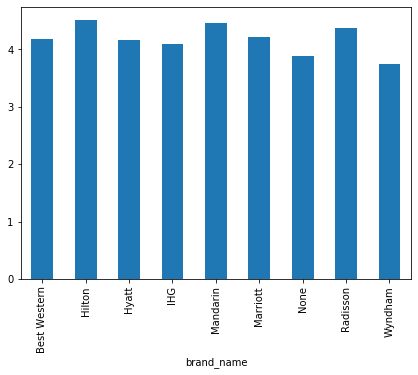

In [214]:
hotels.groupby('brand_name').mean()['average_rate'].plot(kind="bar",figsize=(7,5))
# How different brands perform with respect to each other

In [215]:
star1 = ['Focus on room and service' ,'focus on overall stay and manager' , 'focus on the room' , 'hotel and booking']
star2 = ['Focus on overall stay and staff' , 'focus on room specially the cleanliness' ]
star3 = ['focus on room , bathroom' , 'focus staff and breakfast' , 'focus room , staff and parking ' , 'focus on room and overall stay at night' ,' focus on hotel location' ,' heavy focus on room specially cleanliness and floor']
star4 = ['Focus on location' , 'focus on room ,staff , breakfast' , 'focus on overall stay' , 'focus on pool area and parking' , 'focus on hotel services']
star5 = ['Focus on hotel , room, location and staff' , 'focus on cleanliness and staff' , 'focus on room , breakfast' , 'focus on overall stay especially location and staff' , 'focus on comfort of the hotel beside room , breakfast , staff']

In [216]:
a = []

In [277]:
import statistics

In [291]:
a = []
b = []
i = 0
def predictor(hotel_name,rat):
    i = 0
    df = data[data['name'] == hotel_name]
    if rat == 5:
        df[df['reviews.rating']==rat]
        for review in df['reviews.text']:
            a = []
            bow_vector = dictionary.doc2bow(preprocess(review))
            for index, score in sorted(lda_model5[bow_vector], key=lambda tup: -1*tup[1]):
                   a.append(index)
                   #print("Score: {}\t Topic: {}".format(score, lda_model5.print_topic(index,11)))
            b.append(a[0])
            i += 1
        print(star5[statistics.mode(b)])
    elif rat == 4:
        df[df['reviews.rating']==rat]
        for review in df['reviews.text']:
            a = []
            bow_vector = dictionary.doc2bow(preprocess(review))
            for index, score in sorted(lda_model4[bow_vector], key=lambda tup: -1*tup[1]):
                   a.append(index)
                   #print("Score: {}\t Topic: {}".format(score, lda_model5.print_topic(index,11)))
            b.append(a[0])
            i += 1
        print(star4[statistics.mode(b)])
    elif rat==3:
        df[df['reviews.rating']==rat]
        for review in df['reviews.text']:
            a = []
            bow_vector = dictionary.doc2bow(preprocess(review))
            for index, score in sorted(lda_model3[bow_vector], key=lambda tup: -1*tup[1]):
                   a.append(index)
                   #print("Score: {}\t Topic: {}".format(score, lda_model5.print_topic(index,11)))
            b.append(a[0])
            i += 1
        print(star3[statistics.mode(b)])
    elif rat == 2:
        df[df['reviews.rating']==rat]
        for review in df['reviews.text']:
            a = []
            bow_vector = dictionary.doc2bow(preprocess(review))
            for index, score in sorted(lda_model2[bow_vector], key=lambda tup: -1*tup[1]):
                   a.append(index)
                   #print("Score: {}\t Topic: {}".format(score, lda_model5.print_topic(index,11)))
            b.append(a[0])
            i += 1
        print(star2[statistics.mode(b)])
    elif rat == 1:
        df[df['reviews.rating']==rat]
        for review in df['reviews.text']:
            a = []
            bow_vector = dictionary.doc2bow(preprocess(review))
            for index, score in sorted(lda_model1[bow_vector], key=lambda tup: -1*tup[1]):
                   a.append(index)
                   #print("Score: {}\t Topic: {}".format(score, lda_model5.print_topic(index,11)))
            b.append(a[0])
            i += 1
        print(star1[statistics.mode(b)])

In [280]:
predictor('Hilton Garden Inn Auburn/Opelika',5)

Focus on hotel , room, location and staff


In [283]:
predictor(hotels.loc[1202,'name'],hotels.loc[1202,'maximum_rate'])

focus on room , breakfast


In [284]:
hotels.loc[1202,'name']

'Hampton Inn Suites Red Bluff'

Let us try detecting under performing hotels from the data we have . Our hypothesis can be hotels in premium / luxurious category but with poor rating (below or equal 3.5 average) can be said to be underperforming . Reason for underperformance can be known too

In [288]:
df1 = hotels[hotels['average_rate'] <= 3.5]

In [289]:
df1[df1['category'] == "Premium"]

,name,average_rate,maximum_rate,brand_name,category
0,Best Western Plus South Coast Inn,3.000000,3.0,Best Western,Premium
1,Best Western Carmel's Town House Lodge,3.500000,2.0,Best Western,Premium
19,Four Points by Sheraton San Diego - SeaWorld,3.500000,3.0,Marriott,Premium
35,Best Western Plus Edgewater Hotel,3.500000,3.0,Best Western,Premium
71,Best Western Hospitality Hotel and Suites,3.000000,3.0,Best Western,Premium
75,Hyatt Place Atlanta Buckhead,3.000000,3.0,Hyatt,Premium
77,The Westin Atlanta Airport,3.333333,4.0,Marriott,Premium
83,Hilton San Francisco Financial District,2.000000,1.0,Hilton,Premium
122,Travelodge By Wyndham Phoenix Downtown,3.333333,1.0,Wyndham,Premium
191,Shaver Lake Village Hotel,3.000000,3.0,Hyatt,Premium


In [292]:
# Exploring the key areas reviews are talking about for one of the underperforming hotels

predictor(hotels.loc[19,'name'],hotels.loc[19,'maximum_rate'])

focus room , staff and parking 


In [293]:
hotels.loc[19,'name']

'Four Points by Sheraton San Diego - SeaWorld'

In [294]:

predictor(hotels.loc[83,'name'],hotels.loc[83,'maximum_rate'])

focus on the room


In [295]:
hotels.loc[83,'name']

'Hilton San Francisco Financial District'